In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
data = pd.read_csv('./data/cancer_patient.csv');
data.head()

Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4                    2         2   
1  ...        1            3                    7         8   
2  ...        8            7                    9         2   
3  ...        4            2                    3         1   
4  ...        3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   Snoring   Level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

# Identifier notre variable target
### Variable target : Level


In [3]:
data["Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

# Identifier le nombre de ligne et de colonnes


In [4]:
rows,columns = data.shape
print("Notre dataset contient {} lignes et {} colonnes".format(rows,columns))

Notre dataset contient 1000 lignes et 25 colonnes


In [9]:
#configuration
pd.set_option('display.max_row',columns)
pd.set_option('display.max_columns',columns)

In [10]:
data.dtypes


Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [7]:
# compter les différents types de notre dataset
data.dtypes.value_counts()

int64     23
object     2
dtype: int64

### Types de variables :
- #### Quantitatives :  23
- #### Qualitatives  :  2


# Analyse des valeures manquantes

<AxesSubplot:>

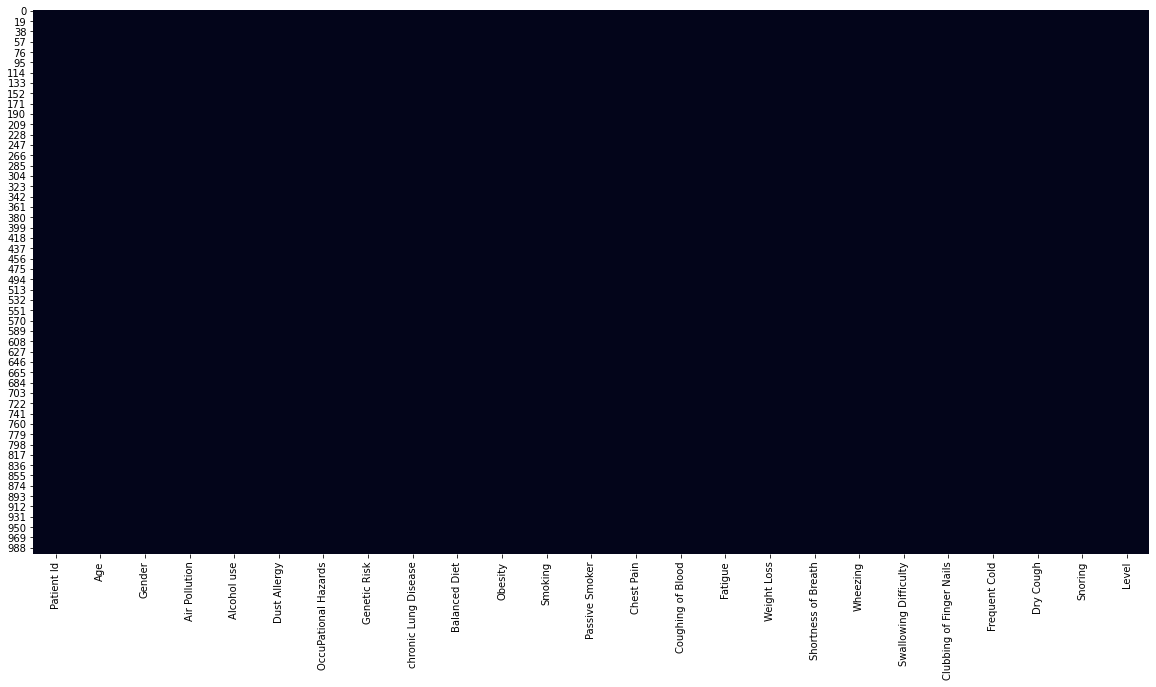

In [19]:

plt.figure(figsize = (20,10))
sns.heatmap(data.isna(),cbar=False)

Comme on peut le constater notre dataset ne contient pas de valeurs manquantes

In [21]:
data.isna().sum()


Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# Analyse du fond
### 1. Supprimer les colonnes inutiles
 

In [26]:
# supprimer la colonne Patient Id
df = data.drop('Patient Id',axis=1)
df.head()

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4        3               2           2                  4        3   
1        2        2               4           2                  3        1   
2        7        2               3           4                  8        8   
3        7        7               7           7                  8        4   
4        7        8               7           7                  9        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High

### 2. Analyser la variable target

In [28]:
df['Level'].value_counts(normalize=True)

High      0.365
Medium    0.332
Low       0.303
Name: Level, dtype: float64

On remarque que nos class sont équilibré
sur 1000 patients nous 36% qui ont potentiellement un cancer, 33% qui ont ou risque d'avoir un cancer et 30% qui ont un risque trés faible d'avoir un cancer.

# Histogrames des variables

### 1. Visualisation des variables quantitatives

<ipython-input-37-f208b7861b43>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

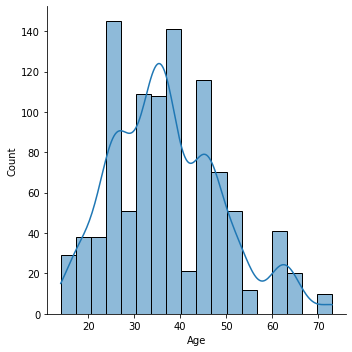

<Figure size 432x288 with 0 Axes>

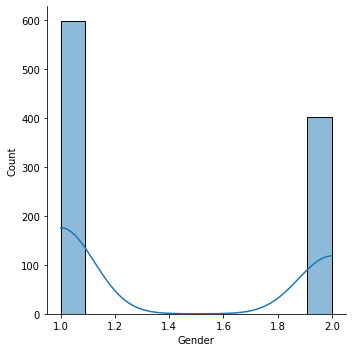

<Figure size 432x288 with 0 Axes>

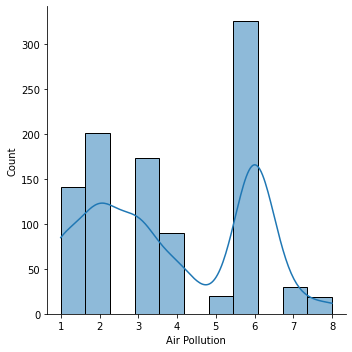

<Figure size 432x288 with 0 Axes>

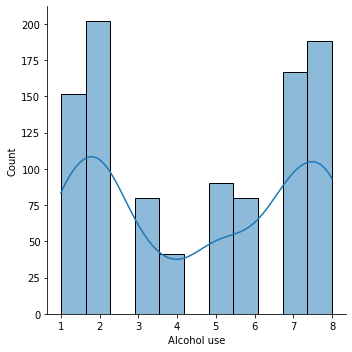

<Figure size 432x288 with 0 Axes>

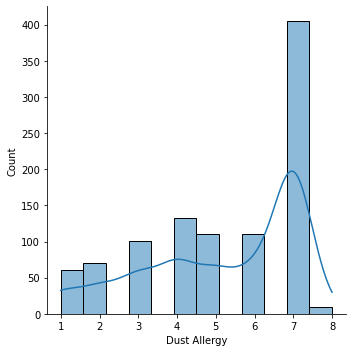

<Figure size 432x288 with 0 Axes>

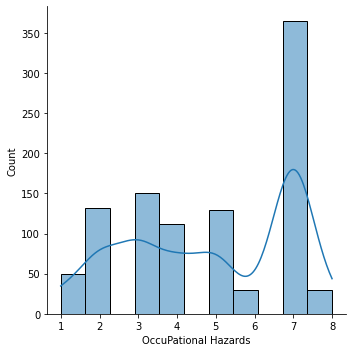

<Figure size 432x288 with 0 Axes>

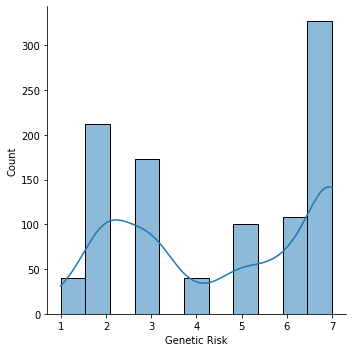

<Figure size 432x288 with 0 Axes>

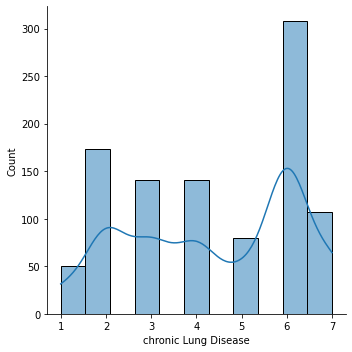

<Figure size 432x288 with 0 Axes>

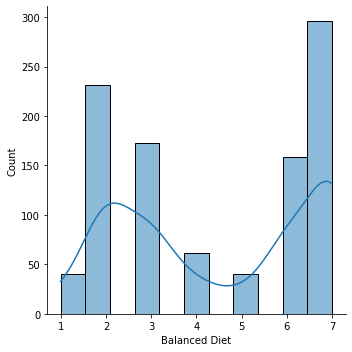

<Figure size 432x288 with 0 Axes>

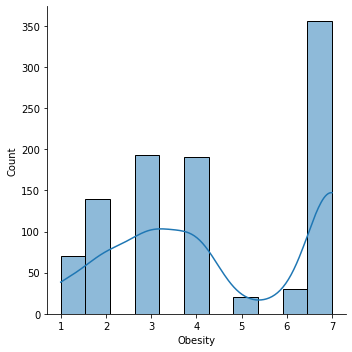

<Figure size 432x288 with 0 Axes>

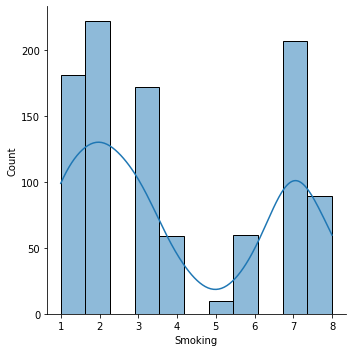

<Figure size 432x288 with 0 Axes>

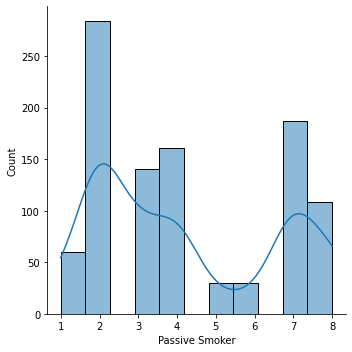

<Figure size 432x288 with 0 Axes>

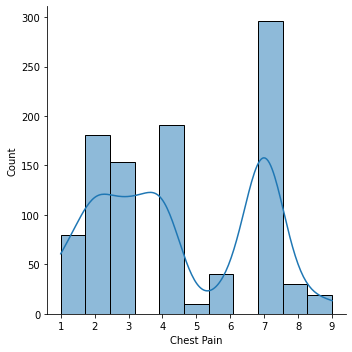

<Figure size 432x288 with 0 Axes>

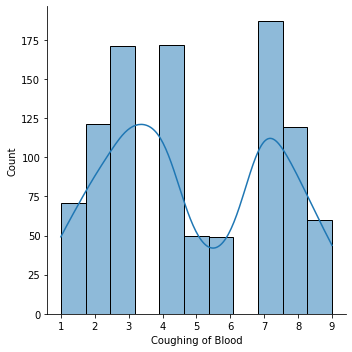

<Figure size 432x288 with 0 Axes>

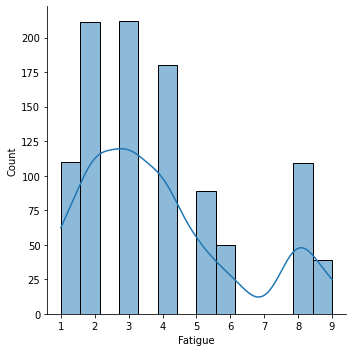

<Figure size 432x288 with 0 Axes>

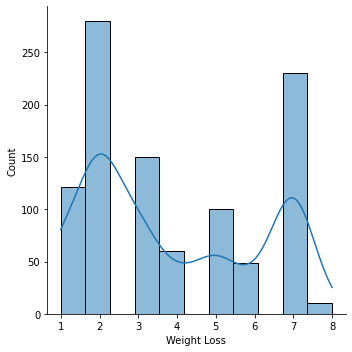

<Figure size 432x288 with 0 Axes>

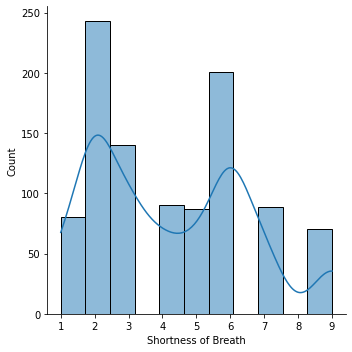

<Figure size 432x288 with 0 Axes>

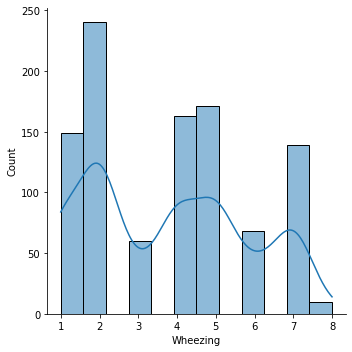

<Figure size 432x288 with 0 Axes>

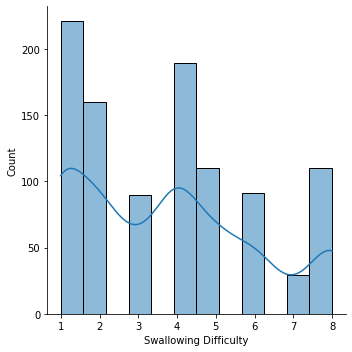

<Figure size 432x288 with 0 Axes>

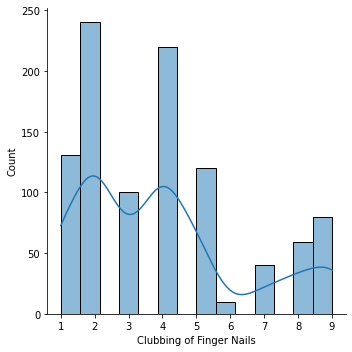

<Figure size 432x288 with 0 Axes>

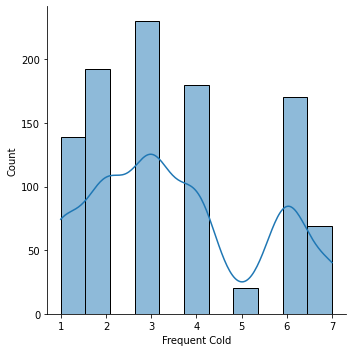

<Figure size 432x288 with 0 Axes>

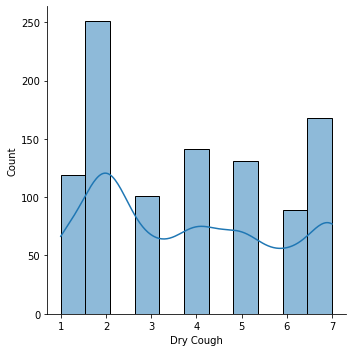

<Figure size 432x288 with 0 Axes>

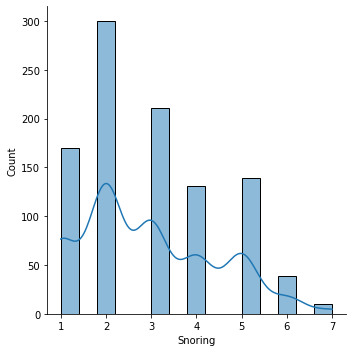

In [37]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.displot(df[col], kde=True)

### 2. Visualisation de la variable target


<AxesSubplot:ylabel='Level'>

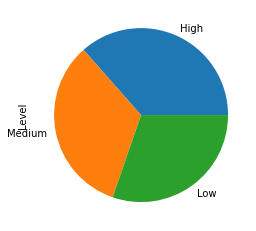

In [39]:
df['Level'].value_counts().plot.pie()

##### Comme mentionné précédement nous constatons que le pourcentage de nos class est équilibré 

# Relation entre notre variable target et les autres variables
### Création de sous-ensembles high, medium et low

In [44]:
high_df = df[df['Level'] == 'High']
medium_df = df[df['Level'] == 'Medium']
low_df = df[df['Level'] == 'Low']
hr,hc = high_df.shape
mr,mc = medium_df.shape
lr,lc = low_df.shape
print('High_df contient {} lignes'.format(hr))
print('Medium_df contient {} lignes'.format(mr))
print('Low_df contient {} lignes'.format(lr))


High_df contient 365 lignes
Medium_df contient 332 lignes
Low_df contient 303 lignes


# Target/Age

In [55]:
print(f"Ces analyses ont été collecter sur des personnes âgées entre : {df['Age'].min()} ans et {df['Age'].max()} ans ce qui fait une moyenne d'âge : {df['Age'].mean()} ans")

Ces analyses ont été collecter sur des personnes âgées entre : 14 ans et 73 ans ce qui fait une moyenne d'âge : 37.174 ans


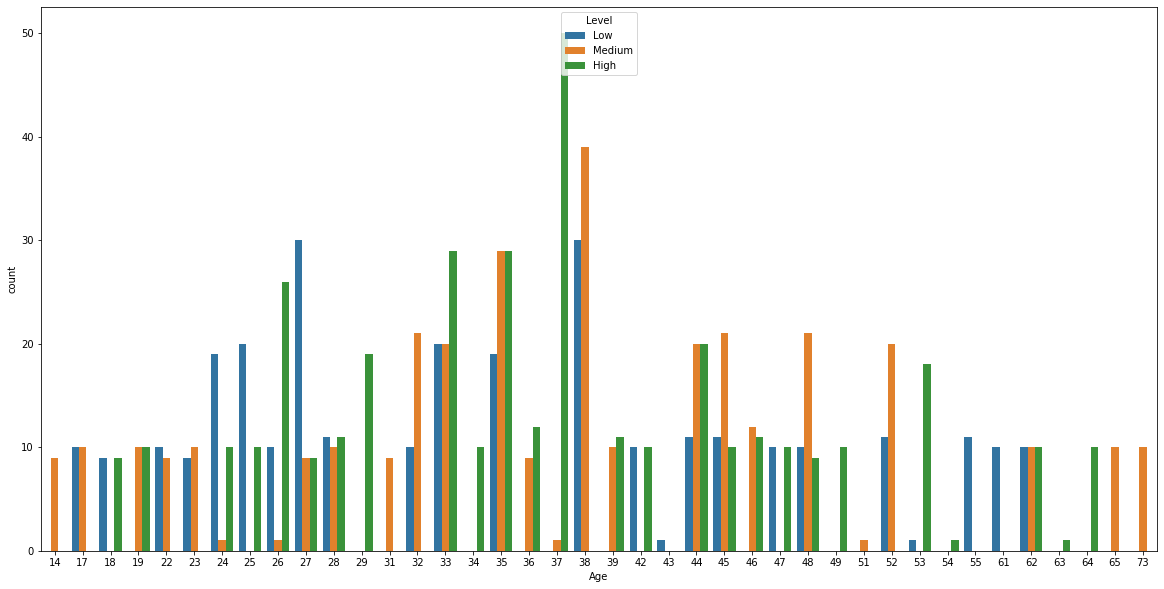

In [49]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'Age',hue='Level',data=df);

On remarque d'après cette figure qu'il n'y a pas d'âge pour attraper un cancer par contre la tranche d'âge 33 à 38 ans présente plus de risque d'avoir un cancer.
Nous n'avons pas de données dans ce dataset concernant les individus âgés entre 0 et 14 ans ce qui ne veut pas dire qu'ils ne sont pas exposé au risque de cancer.  